# Regression Models with Keras

### A. Build a baseline model.
#####     Use the **Keras** library to build a neural network with the following:
#####          - One hidden layer of **10 nodes**, and a **ReLU** activation function
#####          - Use the **adam*** optimizer and **mean squared error** as the loss function.
        
#### 1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the helper **train_test_split** function from Scikit-learn.
#### 2. Train the model on the training data using 50 epochs
#### 3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
#### 4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
#### 5. Report the mean and the standard deviation of the mean squared errors.

In [1]:
!pip install -q keras

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


In [16]:
!wget -q https://cocl.us/concrete_data

In [3]:
df = pd.read_csv('./concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.isna().mean()

Cement                0.0
Blast Furnace Slag    0.0
Fly Ash               0.0
Water                 0.0
Superplasticizer      0.0
Coarse Aggregate      0.0
Fine Aggregate        0.0
Age                   0.0
Strength              0.0
dtype: float64

In [6]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [7]:
X = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age']

y = ['Strength']

In [8]:
n_cols = df[X].shape[1]

In [9]:
def regression_baseline_model():
    
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [12]:
mse_list = []

for _ in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.3)
    model = regression_baseline_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

100%|██████████| 50/50 [03:45<00:00,  4.52s/it]


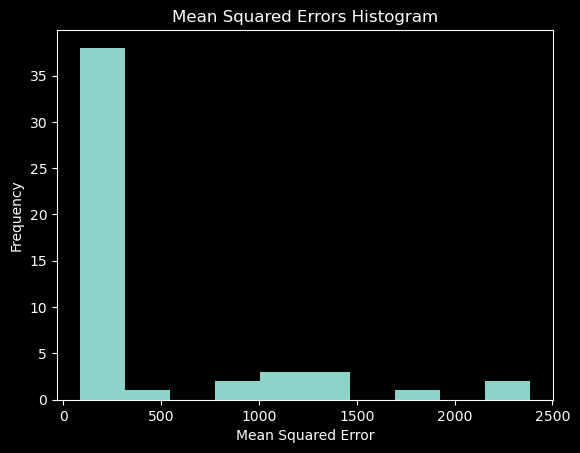

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.hist(mse_list) 
plt.title('Mean Squared Errors Histogram')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.show()

### Report the mean of the mean squared errors

In [14]:
mean_mse = np.mean(mse_list)
print(f'The mean of the mean squared errors is {mean_mse:.2f}')

The mean of the mean squared errors is 446.89


### Report the standard deviation of the mean squared errors

In [15]:
std_mse = np.std(mse_list)
print(f'The standard deviation of the mean squared errors is {std_mse:.2f}')

The standard deviation of the mean squared errors is 573.86


## B. Normalize the data 

### Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

### How does the mean of the mean squared errors compare to that from Step A?

## Normalize the data by substracting the mean and dividing by the standard deviation.

In [16]:
df_norm = (df[X] - df[X].mean()) / df[X].std()
df_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [17]:
mse_list_norm = []

for _ in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(df_norm, df[y], test_size=0.3)
    model = regression_baseline_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_norm.append(mse)

100%|██████████| 50/50 [06:13<00:00,  7.48s/it]


### Report the mean of the mean squared errors

In [21]:
mean_mse_norm = np.mean(mse_list_norm)
print(f'The mean of the mean squared errors is {mean_mse_norm:.2f}')

The mean of the mean squared errors is 351.88


### Report the standard deviation of the mean squared errors

In [20]:
std_mse_norm = np.std(mse_list_norm)
print(f'The standard deviation of the mean squared errors is {std_mse_norm:.2f}')

The standard deviation of the mean squared errors is 86.06


#### Compare mse and std with standart and normalization data

|    | standart      | normalization  |
|----|---------------|----------------|
|mean| { mean_mse }     | { mean_mse_norm }|
|std | { std_mse }      | { std_mse_norm } |

In [32]:
print(f'For standart data mean mse is {mean_mse:.2f} and std is {std_mse:.2f} \nFor normalization data mean mse is {mean_mse_norm:.2f} and std is {std_mse_norm:.2f}')

For standart data mean mse is 446.89 and std is 573.86 
For normalization data mean mse is 351.88 and std is 86.06


## C. Increate the number of epochs 
#### Repeat Part B but use 100 epochs this time for training
#### How does the mean of the mean squared errors compare to that from Step B?

In [33]:
mse_list_norm_100 = []

for _ in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(df_norm, df[y], test_size=0.3)
    model = regression_baseline_model()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_norm_100.append(mse)

100%|██████████| 50/50 [11:45<00:00, 14.12s/it]


In [34]:
mean_mse_norm_100 = np.mean(mse_list_norm_100)
print(f'The mean of the mean squared errors is {mean_mse_norm_100:.2f}')
std_mse_norm_100 = np.std(mse_list_norm_100)
print(f'The standard deviation of the mean squared errors is {std_mse_norm_100:.2f}')

The mean of the mean squared errors is 168.93
The standard deviation of the mean squared errors is 25.52


In [36]:
print(f'For normalization data and 50 epochs mean mse is {mean_mse_norm:.2f} and std is {std_mse_norm:.2f}\
\nFor normalization data and 100 epochs mean mse is {mean_mse_norm_100:.2f} and std is {std_mse_norm_100:.2f}')

For normalization data and 50 epochs mean mse is 351.88 and std is 86.06 
For normalization data and 100 epochs mean mse is 168.93 and std is 25.52


## D.  Increase the number of hidden layers 
#### Repeat part B but use a neural network with the following instead:
#### - Three hidden layers, each of 10 nodes and ReLU activation function.
#### How does the mean of the mean squared errors compare to that from Step B?

In [37]:
def regression_baseline_model_layers():
    
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [38]:
mse_list_norm_layers = []

for _ in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(df_norm, df[y], test_size=0.3)
    model = regression_baseline_model_layers()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_norm_layers.append(mse)

100%|██████████| 50/50 [14:51<00:00, 17.83s/it]


In [39]:
mean_mse_norm_layers = np.mean(mse_list_norm_layers)
print(f'The mean of the mean squared errors is {mean_mse_norm_layers:.2f}')
std_mse_norm_layers = np.std(mse_list_norm_layers)
print(f'The standard deviation of the mean squared errors is {std_mse_norm_layers:.2f}')

The mean of the mean squared errors is 94.61
The standard deviation of the mean squared errors is 21.25


In [43]:
mse_list_norm_100_layers = []

for _ in tqdm(range(50)):
    X_train, X_test, y_train, y_test = train_test_split(df_norm, df[y], test_size=0.3)
    model = regression_baseline_model_layers()
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list_norm_100_layers.append(mse)

100%|██████████| 50/50 [28:19<00:00, 34.00s/it]


In [44]:
mean_mse_norm_100_layers = np.mean(mse_list_norm_100_layers)
print(f'The mean of the mean squared errors is {mean_mse_norm_100_layers:.2f}')
std_mse_norm_100_layers = np.std(mse_list_norm_100_layers)
print(f'The standard deviation of the mean squared errors is {std_mse_norm_100_layers:.2f}')

The mean of the mean squared errors is 55.64
The standard deviation of the mean squared errors is 13.27


In [51]:
print(f'For normalization data and 1 layer model mean mse is {mean_mse_norm:.2f} and std is {std_mse_norm:.2f}\n\n\
For normalization data 1 leyer and 100 epochs mean mse is {mean_mse_norm_100:.2f} and std is {std_mse_norm_100:.2f}\n\
or difference in % mean {(mean_mse_norm/mean_mse_norm_100)*100:.2f}% and std difference is {(std_mse_norm/std_mse_norm_100)*100:.2f}% \n\n\
For normalization data and 4 additional layers mean mse is {mean_mse_norm_layers:.2f} and std is {std_mse_norm_layers:.2f}\n\
or difference in % mean {(mean_mse_norm/mean_mse_norm_layers)*100:.2f}% and std difference is {(std_mse_norm/std_mse_norm_layers)*100:.2f}% \n\n\
For normalization data and 4 additional layers and 100 epochs mean mse is {mean_mse_norm_100_layers:.2f} and std is {std_mse_norm_100_layers:.2f} \n\
or difference in % mean {(mean_mse_norm/mean_mse_norm_100_layers)*100:.2f}% and std difference is {(std_mse_norm/std_mse_norm_100_layers)*100:.2f}%')

For normalization data and 1 layer model mean mse is 351.88 and std is 86.06

For normalization data 1 leyer and 100 epochs mean mse is 168.93 and std is 25.52
or difference in % mean 208.30% and std difference is 337.18% 

For normalization data and 4 additional layers mean mse is 94.61 and std is 21.25
or difference in % mean 371.94% and std difference is 404.94% 

For normalization data and 4 additional layers and 100 epochs mean mse is 55.64 and std is 13.27 
or difference in % mean 632.39% and std difference is 648.80%
